# Introduction to regression models

* [Import relevant libraries](#Import-relevant-libraries)

* [Load data](#Load-data)
    * [Create your own linear model](#Create-your-own-linear-model)
        * [Analyse correlation](#Analyse-correlation)
    * [Creating your linear model by hand](#Creating-your--linear-model-by-hand)
        * [Find the best linear model by hand](#Find-the-best-linear-model-by-hand)
        * [Find the best parameters with an algorithm](#Find-the-best-parameters-with-an-algorithm)
    * [Inference analysis](#inference-analysis)
    
* [Predict wine quality   Regression problem](#Predict-wine-quality---regression-problem)
    * [Simple Linear regression](#Simple-Linear-regression)
    * [Using Holdout method](#Using-Holdout-method)
    * [Multi Linear regression](#Multi-linear-regression)
    * [Predict wine quality   classification problem](#Predict-wine-quality---classification-problem)
        * [Convert quality column in 2 classes](#convert-quality-column-in-2-classes)
        * [Simple Logistic regression](#Simple-Logistic-regression)
        * [Multi Logistic regression](#Multi-logistic-regression)

# Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [2]:
wine_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')

Get 100 samples with random state (seed) = 1

In [3]:
sample_wine_df = wine_df.sample(n=100,random_state=1)

## Create your own linear model

Plot pH in function of fixed acidity

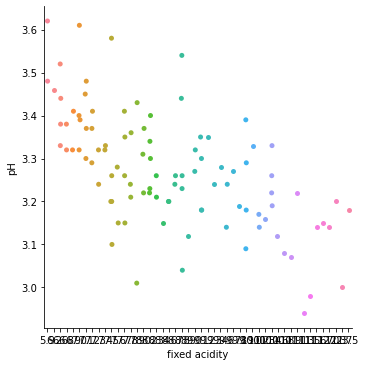

In [4]:
s_x=sample_wine_df['fixed acidity']
s_y=sample_wine_df['pH']
g = sns.catplot(x=s_x, y=s_y, data=sample_wine_df)
#g.set(xticks=[5,20])
#g.set_xticklabels([str(x) for x in list(range(5,15))])
#g.set_xticks([str(x) for x in list(range(5,15))])
#g.set_xticks(range(len(s_x)+1))
#g.set_xticklabels(['5','15'])
#g.set(xlim=(4, 15), xticks=[5,15])

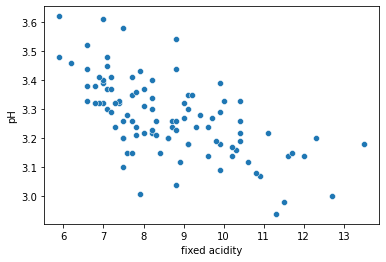

In [5]:
sns.scatterplot(x=sample_wine_df["fixed acidity"], y=sample_wine_df["pH"]);

### Analyse correlation 

What can you say about pH and fixed acidity? are they correlated ? 

In [6]:
corr = sample_wine_df.corr()

<AxesSubplot:>

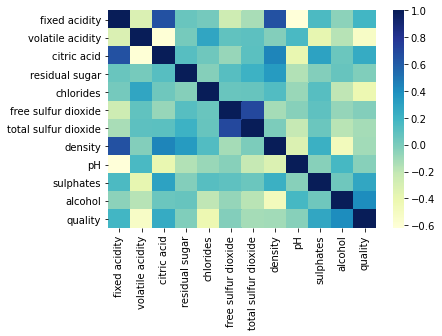

In [7]:
# Heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")

In [8]:
# Unstack correlation matrix 
corr_df = corr.unstack().reset_index() 
corr_df

# rename columns
corr_df.columns = ['feature_1','feature_2', 'correlation'] 

# sort by correlation
corr_df.sort_values(by="correlation",ascending=False, inplace=True) 

# Remove self correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] 
corr_df.head()

,feature_1,feature_2,correlation
66,free sulfur dioxide,total sulfur dioxide,0.697088
77,total sulfur dioxide,free sulfur dioxide,0.697088
2,fixed acidity,citric acid,0.658054
24,citric acid,fixed acidity,0.658054
7,fixed acidity,density,0.652115


In [9]:
pH_corr_df = corr_df[corr_df['feature_1'] == 'pH']
pH_corr_df[pH_corr_df['feature_2'] == 'fixed acidity']

,feature_1,feature_2,correlation
96,pH,fixed acidity,-0.619941


**Answer:** pH and fixed acidity have a negatif correlation of -0.619 ... this means that there is a certain linear tendency where one part of the fixed acidity can explain the variance of pH

### Creating your  linear model by hand

Try to find a linear model by hand. plot it with the sample set

Hint: define an intercept and slope. Then, plot it graphically

y = a * x + b, where a is slope and b is intercept

In [10]:
def plot_line(a, b, ax):
    """Plot a line from slope and intercept on the ax"""
    x_vals = np.array(ax.get_xlim())
    y_vals = a * x_vals + b
    ax.plot(x_vals, y_vals, '-')

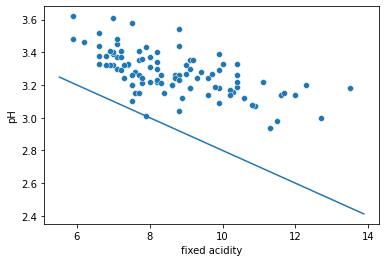

In [11]:
ax = sns.scatterplot(x="fixed acidity", y="pH", data=sample_wine_df)
plot_line(-0.1, 3.8, ax)

### Find the best linear model by hand

what is the best linear model you can find ? try to define different intercepts and slopes by hand

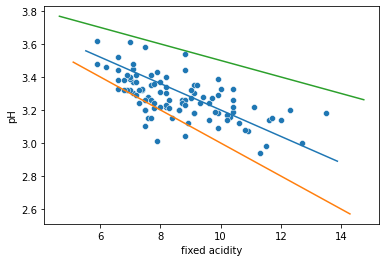

In [12]:
ax = sns.scatterplot(x="fixed acidity", y="pH", data=sample_wine_df)
a_list = [-0.08, -0.1, -0.05]
b_list = [4, 4, 4]
for i in range(len(a_list)):
    plot_line(a_list[i], b_list[i], ax)

Compare to seaborn regplot

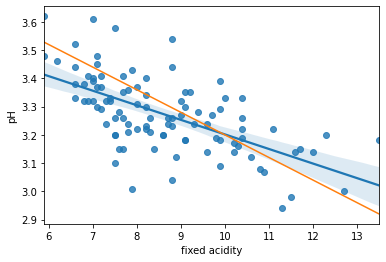

In [13]:
# plot your linear model with regplot and compare
ax = sns.regplot(y='pH', x='fixed acidity', data=sample_wine_df)
plot_line(-0.08, 4, ax)

How far is your linear model from seaborn model?

In [14]:
# quite different, the slope is higher than the one calculated by regplot

How do you evaluate the performance of your linear models at each iteration ?

In [15]:
# using a loss function to evaluate 
# the difference between observations and predictions

In [16]:
# function that calculate the square errors
def squared_errors(slope, intercept, fixed_acidity, pH):
    return (pH - ((slope * fixed_acidity) + intercept)) ** 2

In [17]:
# function that calculate the mse
def mse(slope, intercept, fixed_acidity, pH):
    errors = squared_errors(slope, intercept, fixed_acidity, pH)
    return np.mean(errors)

In [18]:
mse(-0.1, 4, sample_wine_df["fixed acidity"], sample_wine_df.pH)

0.035038000000000034

In [19]:
squared_errors(-0.1, 4, sample_wine_df["fixed acidity"], sample_wine_df.pH).sum()

3.5038000000000027

### Find the best parameters with an algorithm

Try to create a method where each time you define a slope or intercept, you reduce the error of the model. Then, you iterate to find the best model

Hint: choose a fixed intercept, find the slope that reduce the error of the model. Then keep that slope, find the new intercept that reduce the error of the model ...

##### Fixing intercept to find best slope

In [20]:
intercept_initial_guess = 4 # For instance, we may suppose there is always a small transaction fee even for very small flats?

# Create a range of 100 slopes which contains what you believe is the optimal slope (hint: np.linspace())
slope_range = np.linspace(-0.1,-0.05,100)

# Create the list of MSEs for each slope value
mses = list(map(lambda x: mse(x, intercept_initial_guess, sample_wine_df["fixed acidity"], sample_wine_df.pH), slope_range))

Text(0, 0.5, 'MSE')

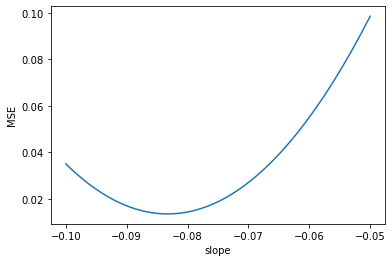

In [21]:
# Plot MSEs against slopes. Do you see a minimum? If not, try another range of slopes!
plt.plot(slope_range, mses)
plt.xlabel("slope")
plt.ylabel("MSE")

In [22]:
mse_min = min(mses)
slope_best = slope_range[mses.index(mse_min)]
print('mse_min:', mse_min)
print('slope_best:', slope_best)

mse_min: 0.013490916666666677
slope_best: -0.08333333333333334


##### Fixing best slope to find best intercept

Text(0, 0.5, 'MSE')

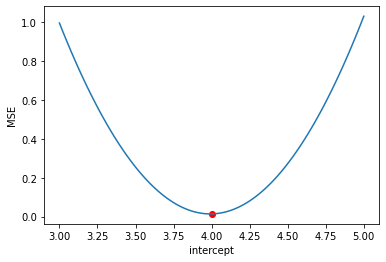

In [23]:
# Create a range of 100 intercepts which contains what you believe is the optimal intercept
intercept_range = np.linspace(3,5, 100)

# Create the list of MSEs for each intercept value
mses = list(map(lambda x: mse(slope_best, x, sample_wine_df["fixed acidity"], sample_wine_df.pH), intercept_range))

# Plot MSEs against slopes. Do you see a minimum? If not, try another range of slopes!
plt.plot(intercept_range, mses)
plt.scatter(intercept_initial_guess, mse(slope_best, intercept_initial_guess, sample_wine_df["fixed acidity"], sample_wine_df.pH), color = 'r')
plt.xlabel('intercept')
plt.ylabel("MSE")

In [24]:
# Compute the min value of MSEs for slope=slope_best and store the corresponding best intercept
mse_min = min(mses)
intercept_best = intercept_range[mses.index(mse_min)]

print('mse_min:', mse_min)
print('intercept_best:', intercept_best)

mse_min: 0.013416852795633101
intercept_best: 3.98989898989899


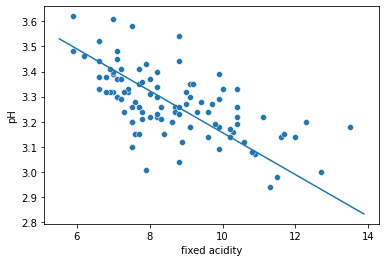

In [25]:
ax = sns.scatterplot(x="fixed acidity", y="pH", data=sample_wine_df)
plot_line(slope_best, intercept_best, ax)

How many iterations did you tried ? what are the best intercept and slope you found? Are you closer to the seaborn linear model ?  

In [26]:
# just 2 iterations. 
print(slope_best)
print(intercept_best)


-0.08333333333333334
3.98989898989899


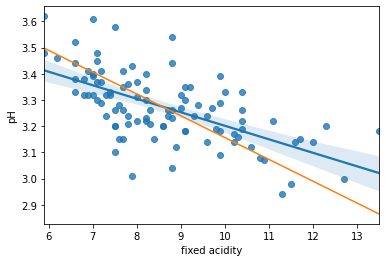

In [27]:
# plot your linear model with regplot and compare
ax = sns.regplot(y='pH', x='fixed acidity', data=sample_wine_df)
plot_line(slope_best, intercept_best, ax)

According to you ... is this the OLS method ? can you describe with your own words, how it works? how different is from your method ?

Compare with the Linear regression used in scikit learn

In [28]:
# Import the model
from sklearn.linear_model import LinearRegression

# Instanciate the model
model = LinearRegression()

# Define X and y
X = sample_wine_df[['fixed acidity']]
y = sample_wine_df['pH']

# Train the model on the data
model.fit(X, y)
print(sample_wine_df[['fixed acidity']])
# check results
# model's slope (a)
print(model.coef_)

# model's intercept (b)
print(model.intercept_)

      fixed acidity
75              8.8
1283            8.7
408            10.4
1281            7.1
1118            7.1
...             ...
529             9.9
912            10.0
1227            9.0
1374            6.8
1198            7.7

[100 rows x 1 columns]
[-0.051601]
3.7176554637668797


Are you close to these values ?

In [29]:
# a bit, but not enough

# my best parameters
print(slope_best)
print(intercept_best)


-0.08333333333333334
3.98989898989899


In [30]:
# sklearn best parameters
print(model.coef_)
print(model.intercept_)

[-0.051601]
3.7176554637668797


In [31]:
mse(slope_best, intercept_best, sample_wine_df["fixed acidity"], sample_wine_df.pH)

0.013416852795633101

In [32]:
mse(model.coef_, model.intercept_, sample_wine_df["fixed acidity"], sample_wine_df.pH)

0.010852905727191513

How do you interpret these values? What do they say about the pH and fixed acidity?

In [33]:
# the mean error between 

## inference analysis

Get a new sample of 100 with different random state (seed) = 60

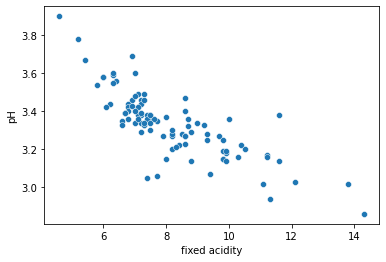

In [34]:
sample_wine_df_2 = wine_df.sample(n=100,random_state=60)
sample_wine_df_2
sns.scatterplot(x=sample_wine_df_2["fixed acidity"], y=sample_wine_df_2["pH"]);

[-0.07687905]
3.9588041512911536


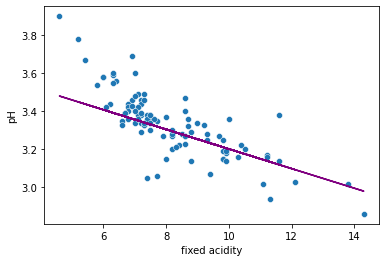

In [35]:
from sklearn.linear_model import LinearRegression

# Instanciate the model
model_2 = LinearRegression()

# Define X and y
X = sample_wine_df_2[['fixed acidity']]
y = sample_wine_df_2['pH']

# Train the model on the data
model_2.fit(X, y)

# check results
# model's slope (a)
print(model_2.coef_)

# model's intercept (b)
print(model_2.intercept_)

x = sample_wine_df_2['fixed acidity']
y = model.coef_*X+model.intercept_
sns.scatterplot(x=sample_wine_df_2["fixed acidity"], y=sample_wine_df_2["pH"]);
plt.plot(x,y, color='purple')

gradient_b = 3.201735600910638e-05
b = 3.9588120000872364
a =  -0.07688000000005622
gradient_a =  -0.0003246591386769637
error = 1.0567001063040027
fonction = [3.42834  3.1977   3.497532 3.397588 3.366836 3.190012 3.443716 3.420652
 3.382212 3.282268 3.382212 3.42834  3.405276 3.213076 3.405276 3.3899
 3.343772 3.482156 3.405276 3.412964 3.097756 3.382212 3.3899   3.405276
 3.436028 3.405276 3.366836 3.497532 3.397588 3.090068 3.205388 3.343772
 3.412964 3.436028 3.289956 3.205388 3.328396 3.305332 3.436028 3.166948
 3.105444 2.859428 2.897868 3.251516 3.15926  3.46678  3.42834  3.559036
 3.512908 3.328396 3.23614  3.028564 3.605164 3.31302  3.474468 3.443716
 3.412964 3.297644 3.443716 3.243828 3.412964 3.451404 3.405276 3.374524
 3.35146  3.205388 3.3899   3.451404 3.420652 3.1977   3.54366  3.067004
 3.297644 3.1977   3.474468 3.412964 3.067004 3.297644 3.205388 3.382212
 3.382212 3.282268 3.397588 3.397588 3.097756 3.420652 3.320708 3.328396
 3.151572 3.397588 3.474468 3.328396 3.4

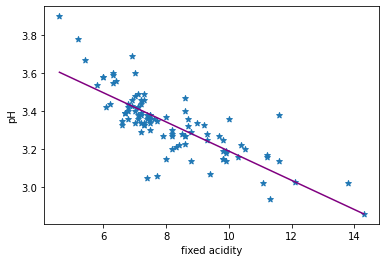

array([-0.07687905,  3.95880415])

In [36]:
plt.scatter(x ='fixed acidity', y = 'pH', data=sample_wine_df_2, marker ='*')
plt.xlabel('fixed acidity')
plt.ylabel('pH')

x = sample_wine_df_2['fixed acidity'].values
y = sample_wine_df_2['pH'].values

b = y.mean()
a = 0

def y_pred (x,a,b):
    return a * x + b

def calcul_error():
    e = [(y_pred(x, a, b)[i]- y[i])**2 for i in range(100)]
    return sum(e)

def calcul_gradient_a():
    res = 2*a*x*x+2*b*x-2*x*y
    return res.sum()

def calcul_gradient_b():
    res = 2*a*x+2*b-2*y
    return res.sum()

alpha = 0.000001

for i in range(1000):
    
    while calcul_gradient_a() > 0:
        a -= alpha
    while calcul_gradient_b() < 0:
        b += alpha

print("gradient_b =", calcul_gradient_b())
print("b =", b)
print("a = ", a)
print("gradient_a = ", calcul_gradient_a())
print("error =", calcul_error())
print('fonction =', y_pred(x,a,b))
plt.plot([min(x), max(x)], [y_pred(min(x), a, b), y_pred(max(x), a, b)], color='purple') # predicted
plt.show()
(np.polyfit(x, y, 1))

Does your best linear model fit with this new sample set ?  Why ?


In [37]:
#Of course not this is a new set of data 

How can you solve the problem ?

In [38]:
# You have to recreated a new linear model as I did higher 

# Predict wine quality - regression problem

## Simple Linear regression

Let's try to create a new linear regression. This time, try to find the best model to predict quality in function of pH

Follow the same steps as before: 
- choose a random sample with fixed seed
- use seaborn to see the linear model in this sample
- calculate the best linear regression
- check if the model fits with a new sample

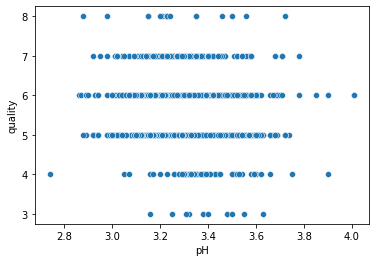

In [39]:
sample_wine_df_2
sns.scatterplot(y=wine_df["quality"], x=wine_df["pH"]);

How good is this model performing? What is the error? is it low or high ?

### Using Holdout method 

Use train split method to divide the dataset in 70% train set and 30% test set

In [40]:
from sklearn.model_selection import train_test_split

# Choose your feature and your target
X = sample_wine_df[['alcohol']]
y = sample_wine_df['residual sugar']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

In [41]:
# Fit the model with the train set
model.fit(X_train, y_train)

LinearRegression()

In [42]:
##### Evaluate the model with the test set
model.score(X_test, y_test)

-0.9810977296307017

Is this score good or bad? What does it means? 

Try another feature. Replace pH with fixed acidity, volatile acidity, ...

Which feature increases this value? 

Do you think you can do better ?

## Multi linear regression

Let's add multiple features in the regression model. Then create a new model and compare your results with Simple regression. Is it better or worst? 

In [43]:
# Choose your feature and your target
X = sample_wine_df[['pH','alcohol', 'fixed acidity', 'volatile acidity','chlorides']]
y = sample_wine_df['quality']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.20821106544507884

Try with all the features (all without column quality of course). 

Create a new model and compare with the last one. Is it better? Why? 



If you add the column quality in the variable X, what would happen ? 

In [44]:
#Of course the score would be 1.0 because quality and quality are the same data

Do you think that there are features that are not helping to increase the performance? Which ones do you suspect? 

Do you know a method to identify them? 

How can you find the best combination of features to increase the performance of the model?

# Predict wine quality - classification problem

## convert quality column in 2 classes

Create a classification version (good or bad) of target variable (quality). To do so, let's consider that the wine with quality equal of higher than 7 is good quality and the rest bad quality. 

You can call the new column goodquality

In [45]:
# Create Classification version of target variable
red_df = wine_df.copy()
red_df['goodquality'] = [1 if x >= 7 else 0 for x in red_df['quality']]
# Separate feature variables and target variable
X = red_df.drop(['quality','goodquality'], axis = 1)
y = red_df['goodquality']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

red_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


How many samples are considered as good and how many are bad? Is this balanced

In [46]:
red_df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

## Simple Logistic regression

Try to create a first logistic regression model from a sample

In [72]:
# Choose your feature and your target
X = red_df[['alcohol']]
y = red_df['goodquality']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LogisticRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)


0.8854166666666666

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
Y_predicted = model.predict(X_test)
Y_predicted

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [75]:
X_test

,alcohol
75,10.5
1283,10.2
408,11.3
1281,10.4
1118,13.3
...,...
1596,11.0
985,11.3
671,9.5
1379,10.8


In [76]:
model.coef_

array([[1.02421448]])

In [77]:
model.intercept_

array([-12.87711027])

In [99]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))
def prediction_fonction(alcohol):
    z = model.coef_ * alcohol - model.intercept_
    y = sigmoid(z)
    return y

In [100]:
alcohol = 7
prediction_fonction(alcohol)

0.9999999980327154

In [101]:
alcohol = 1 
prediction_fonction(alcohol)

0.9999990822360917

In classification, how do you evaluate the performance of the model ?

In [96]:
#confusion matrix
from sklearn.metrics import confusion_matrix

In [97]:
matrix = confusion_matrix(y_test, Y_predicted)
matrix

array([[415,  10],
       [ 45,  10]], dtype=int64)

<AxesSubplot:>

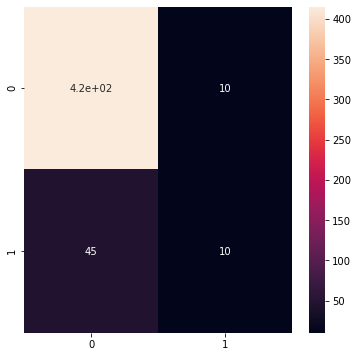

In [98]:
import seaborn as sn
plt.figure(figsize = (6,6))
sn.heatmap(matrix, annot=True)

Try different pair of data sets: (pH, goodquality), (fixed acidity, goodquality), (alcohol, goodquality) 

Which pair performs better?

## Multi logistic regression

Add new features to the model, try to find the best model reducing the error. 

Use everything you learned so far and good luck :)

In [59]:
# Choose your feature and your target
X = red_df[["volatile acidity", "residual sugar","chlorides", "free sulfur dioxide", "pH", "sulphates", "alcohol"]]
y = red_df['goodquality']

# X2 = red_df[['sulphates', 'alcohol', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)


clf = LogisticRegression(max_iter=1600).fit(X_train, y_train)

y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.89375

In [60]:
a1 = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})
a1.value_counts()

Actual value  Predicted value
0             0                  412
1             0                   38
              1                   17
0             1                   13
dtype: int64

In [61]:
from sklearn.metrics import classification_report
y_true = y_test
y_pred = y_pred
target_names = ['Bad Wine(0)', 'Bad Wine(1)']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 Bad Wine(0)       0.92      0.97      0.94       425
 Bad Wine(1)       0.57      0.31      0.40        55

    accuracy                           0.89       480
   macro avg       0.74      0.64      0.67       480
weighted avg       0.88      0.89      0.88       480



Feature: 0, Score: -0.00000
Feature: 1, Score: 12.44483
Feature: 2, Score: 0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 93.32225
Feature: 5, Score: 86.50811
Feature: 6, Score: 26.74607
Feature: 7, Score: 3.28535
Feature: 8, Score: 0.00000
Feature: 9, Score: -0.00000


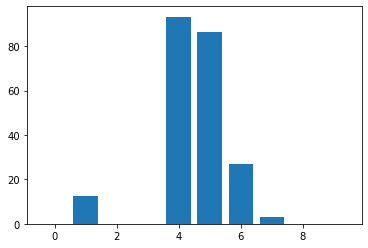

In [62]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()